In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
history_df_01 = pd.read_csv('custom-albert-history-03.csv')
history_df_02 = pd.read_csv('custom-albert-fine-tuned-history-03.csv')

In [3]:
history_pretrain_df = pd.concat([history_df_01, history_df_02])
history_pretrain_df = history_pretrain_df.reset_index(drop=True)

In [4]:
history_pretrain_df = history_pretrain_df.rename(columns={'loss': 'Training Loss after Custom Pre-training ALBERT', 
                                        'val_loss': 'Validation Loss after Custom Pre-training ALBERT'})

In [5]:
history_pretrain_df.head()

,Unnamed: 0,Training Loss after Custom Pre-training ALBERT,root_mean_squared_error,Validation Loss after Custom Pre-training ALBERT,val_root_mean_squared_error
0,0,1.993859,1.412041,1.180642,1.086573
1,1,1.486832,1.219357,0.996838,0.998418
2,2,1.316930,1.147576,0.889186,0.942967
3,3,1.228222,1.108252,0.811201,0.900667
4,4,1.136621,1.066124,0.776895,0.881417


In [6]:
history_pretrain_df = history_pretrain_df[['Training Loss after Custom Pre-training ALBERT', 
                         'Validation Loss after Custom Pre-training ALBERT']]

In [7]:
history_pretrain_df.head()

,Training Loss after Custom Pre-training ALBERT,Validation Loss after Custom Pre-training ALBERT
0,1.993859,1.180642
1,1.486832,0.996838
2,1.316930,0.889186
3,1.228222,0.811201
4,1.136621,0.776895


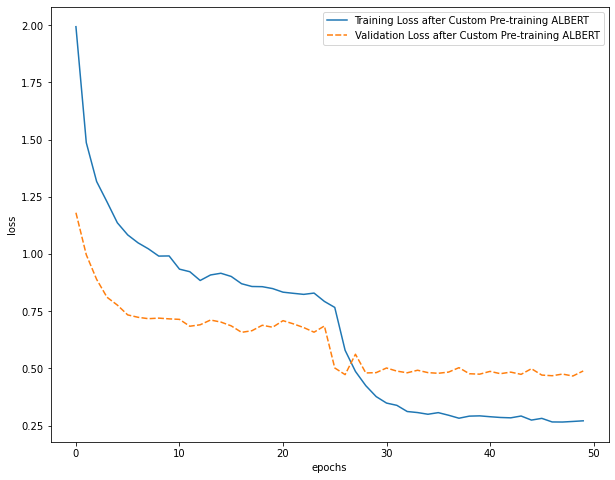

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=history_pretrain_df)
ax.set(xlabel='epochs', ylabel='loss')
plt.show()

In [9]:
history_df_01 = pd.read_csv('../Scenario 1/fine-tuning-albert-history-01.csv')
history_df_02 = pd.read_csv('../Scenario 1/fine-tuning-albert-history-01-fine-tuned.csv')

In [10]:
history_finetune_df = pd.concat([history_df_01, history_df_02])
history_finetune_df = history_finetune_df.reset_index(drop=True)
history_finetune_df = history_finetune_df.rename(columns={'loss': 'Training Loss by Fine-tuning normal ALBERT', 
                                        'val_loss': 'Validation Loss by Fine-tuning normal ALBERT'})

In [11]:
history_finetune_df = history_finetune_df[['Training Loss by Fine-tuning normal ALBERT', 
                         'Validation Loss by Fine-tuning normal ALBERT']]

In [12]:
history_df = pd.concat([history_pretrain_df, history_finetune_df], axis=1)

In [13]:
history_df = history_df[['Validation Loss by Fine-tuning normal ALBERT', 'Validation Loss after Custom Pre-training ALBERT']]

In [14]:
history_df.head()

,Validation Loss by Fine-tuning normal ALBERT,Validation Loss after Custom Pre-training ALBERT
0,1.077139,1.180642
1,0.933539,0.996838
2,0.833126,0.889186
3,0.826941,0.811201
4,0.795601,0.776895


In [15]:
history_df = history_df.rename(columns={'Validation Loss by Fine-tuning normal ALBERT': 'Fine-tuning standard ALBERT', 
                                        'Validation Loss after Custom Pre-training ALBERT': 'Fine-tuning custom pre-trained ALBERT'})

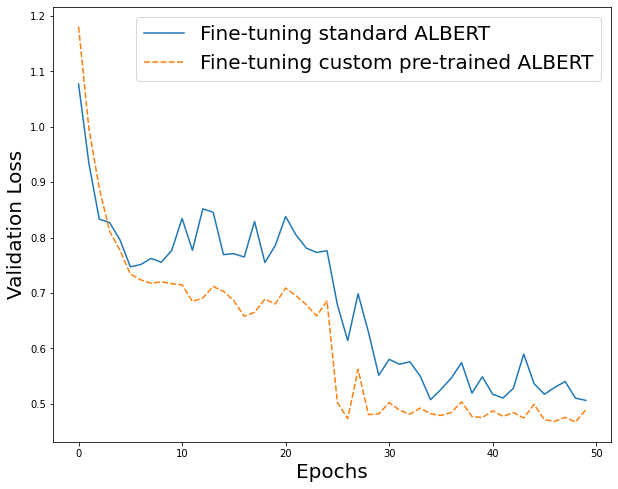

In [17]:
plt.figure(figsize=(10, 8))
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('legend', fontsize=20)    # legend fontsize
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epochs', ylabel='Validation Loss')
plt.show()